In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import scipy.stats

In [ ]:
train = pd.read_csv('data/train_ozone.csv')
test = pd.read_csv('data/test_ozone.csv')

## 데이터 표준화

In [72]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,6.356108,0.027,4.330733,3.496508,49.0
1,6,13,20.1,0.0,1.4,48.0,6.820016,0.042,4.290459,3.688879,159.0
2,7,6,13.9,0.0,0.7,79.0,7.231287,0.033,3.465736,2.944439,26.0
3,8,23,8.1,0.0,2.7,54.0,6.852243,0.040,4.317488,4.158883,57.0
4,9,18,29.5,0.0,4.8,7.0,7.600902,0.057,3.295837,2.397895,431.0


In [73]:
from sklearn.preprocessing import StandardScaler
import scipy as sp
import scipy.stats

In [45]:
frame_features = train[["hour_bef_temperature", "hour_bef_windspeed", "hour_bef_humidity",
               "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"]]

frame_features

,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,16.3,1.5,89.0,576.0,0.027,76.0,33.0
1,20.1,1.4,48.0,916.0,0.042,73.0,40.0
2,13.9,0.7,79.0,1382.0,0.033,32.0,19.0
3,8.1,2.7,54.0,946.0,0.040,75.0,64.0
4,29.5,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...
1454,16.8,1.6,53.0,2000.0,0.031,37.0,27.0
1455,10.8,3.8,45.0,2000.0,0.039,34.0,19.0
1456,18.3,1.9,54.0,2000.0,0.009,30.0,21.0
1457,20.7,3.7,37.0,1395.0,0.082,71.0,36.0


In [46]:
# 원래 데이터들의 평균과 분산 확인 
print('feature 들의 평균 값')
print(frame_features.mean())
print('\nfeature 들의 분산 값')
print(frame_features.var())

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(frame_features)
train_scaled = scaler.transform(frame_features)

print("\n=========== 표준화 ==============\n")

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
train_df_scaled = pd.DataFrame(data = train_scaled)
print('feature 들의 평균 값')
print(train_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(train_df_scaled.var())

feature 들의 평균 값
hour_bef_temperature      16.717447
hour_bef_windspeed         2.479048
hour_bef_humidity         52.231256
hour_bef_visibility     1405.217675
hour_bef_ozone             0.038494
hour_bef_pm10             57.168905
hour_bef_pm2.5            30.325747
dtype: float64

feature 들의 분산 값
hour_bef_temperature        27.411041
hour_bef_windspeed           1.887889
hour_bef_humidity          414.383439
hour_bef_visibility     339576.138634
hour_bef_ozone               0.000320
hour_bef_pm10              947.089179
hour_bef_pm2.5             199.107973
dtype: float64

=========== 표준화 ==============

feature 들의 평균 값
0    1.248716e-16
1   -3.019441e-16
2    1.687402e-16
3   -1.814100e-16
4   -7.913858e-17
5    1.627668e-16
6    2.194574e-16
dtype: float64

feature 들의 분산 값
0    1.000686
1    1.000686
2    1.000686
3    1.000686
4    1.000686
5    1.000686
6    1.000686
dtype: float64


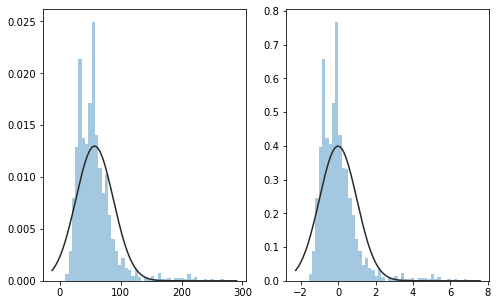

In [48]:
# 각 값들의 정규 분포 모양 비교비교 
f,ax = plt.subplots(1,2,figsize=(8,5))

# 표준화 전 정규분포 
x0 = train['hour_bef_pm10'].dropna().values
sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)

# 표준화 이후 정규 분포 
x1 = train_df_scaled[5].values
sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) 
plt.show()

## 데이터 정규화

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(train_df_scaled)
train_scaled = scaler.transform(train_df_scaled)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
train_minmax = pd.DataFrame(data = train_scaled, columns = frame_features.columns, index = train.index)
print('feature들의 최소 값')
print(train_minmax.min())
print('\nfeature들의 최대 값')
print(train_minmax.max())

feature들의 최소 값
hour_bef_temperature    0.0
hour_bef_windspeed      0.0
hour_bef_humidity       0.0
hour_bef_visibility     0.0
hour_bef_ozone          0.0
hour_bef_pm10           0.0
hour_bef_pm2.5          0.0
dtype: float64

feature들의 최대 값
hour_bef_temperature    1.0
hour_bef_windspeed      1.0
hour_bef_humidity       1.0
hour_bef_visibility     1.0
hour_bef_ozone          1.0
hour_bef_pm10           1.0
hour_bef_pm2.5          1.0
dtype: float64


In [59]:
train_minmax.head()

,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0.490706,0.1875,0.891304,0.259105,0.282353,0.257692,0.304878
1,0.631970,0.1750,0.445652,0.436004,0.458824,0.246154,0.390244
2,0.401487,0.0875,0.782609,0.678460,0.352941,0.088462,0.134146
3,0.185874,0.3375,0.510870,0.451613,0.435294,0.253846,0.682927
4,0.981413,0.6000,0.000000,1.000000,0.635294,0.069231,0.036585


In [60]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
